In [38]:
import cv2
import numpy as np

In [39]:
src = np.zeros((300, 300, 3), dtype=np.uint8)

In [40]:
len(src), len(src[0]), len(src[0][0]), src[0][0]

(300, 300, 3, array([0, 0, 0], dtype=uint8))

In [41]:
src[0, 0] = [1, 2, 3]
src[0, 0]

array([1, 2, 3], dtype=uint8)

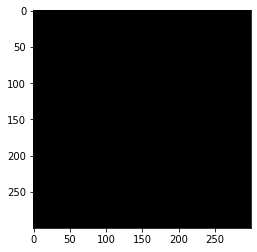

In [42]:
import matplotlib.pyplot as plt

plt.imshow(src)

In [18]:
a = np.array(np.array([1, 2, 3]) / 3)
a

array([0.33333333, 0.66666667, 1.        ])

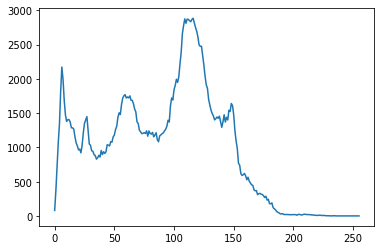

In [47]:
img = cv2.imread("fruits.jpg", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

In [44]:
hist[:5], hist.shape

(array([[  80.],
        [ 367.],
        [ 730.],
        [1064.],
        [1336.]], dtype=float32),
 (256, 1))

In [48]:
hist = hist.flatten()
hist[:5], hist.shape

(array([  80.,  367.,  730., 1064., 1336.], dtype=float32), (256,))

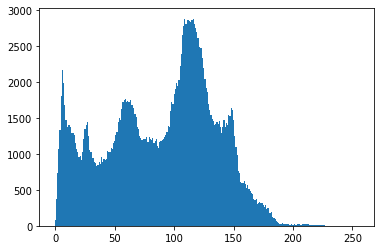

In [53]:
hist
plt.bar(np.arange(len(hist)), hist, width=1,)
plt.show()

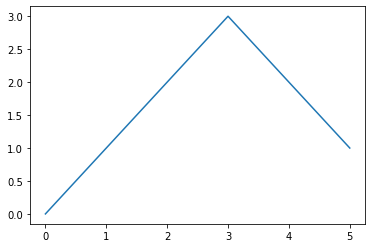

In [64]:
arr = np.array([0, 1, 2, 3, 2, 1])
plt.plot(arr)
plt.show()

In [67]:
arr = arr.reshape(1, len(arr))
arr

array([[0, 1, 2, 3, 2, 1]])

In [68]:
arr.T

array([[0],
       [1],
       [2],
       [3],
       [2],
       [1]])

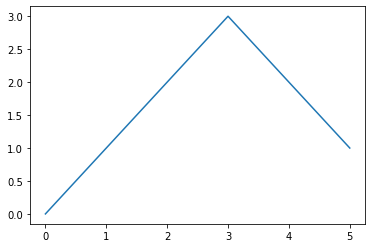

In [69]:
plt.plot(arr.T)
plt.show()

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def my_calcHist(src):
    ###############################
    # TODO                        #
    # my_calcHist완성             #
    # src : input image           #
    # hist : src의 히스토그램      #
    ###############################
    h, w = src.shape[:2]
    hist = np.zeros((256,))
    for row in range(h):
        for col in range(w):
            intensity = src[row, col]
            hist[intensity] += 1
    return hist

def my_normalize_hist(hist, pixel_num):
    ########################################################
    # TODO                                                 #
    # my_normalize_hist완성                                #
    # hist : 히스토그램                                     #
    # pixel_num : image의 전체 픽셀 수                      #
    # normalized_hist : 히스토그램값을 총 픽셀수로 나눔      #
    ########################################################
    normalized_hist = np.array(hist) / pixel_num
    return normalized_hist


def my_PDF2CDF(pdf):
    ########################################################
    # TODO                                                 #
    # my_PDF2CDF완성                                       #
    # pdf : normalized_hist                                #
    # cdf : pdf의 누적                                     #
    ########################################################
    length = pdf.shape[0]
    cdf = np.zeros((length, ))
    cdf[0] = pdf[0]
    for i in range(1, length):
        cdf[i] = cdf[i-1] + pdf[i]
    print(len(cdf))
    return cdf


def my_denormalize(normalized, gray_level):
    ########################################################
    # TODO                                                 #
    # my_denormalize완성                                   #
    # normalized : 누적된pdf값(cdf)                        #
    # gray_level : max_gray_level                          #
    # denormalized : normalized와 gray_level을 곱함        #
    ########################################################
    denormalized = normalized * gray_level
    return denormalized


def my_equal_img(src, output_gray_level):
    ###################################################################
    # TODO                                                            #
    # my_equal_img완성                                                #
    # src : input image                                               #
    # output_gray_level : denormalized(정수값으로 변경된 gray_level)   #
    # dst : equalization된 결과 이미지                                 #
    ####################################################################
    h, w = src.shape
    dst = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for k in range(w):
            dst[i][k] = output_gray_level[src[i][k]]
    return dst

#input_image의  equalization된 histogram & image 를 return
def my_hist_equal(src):
    (h, w) = src.shape
    max_gray_level = 255
    histogram = my_calcHist(src)
    normalized_histogram = my_normalize_hist(histogram, h * w)
    normalized_output = my_PDF2CDF(normalized_histogram)
    denormalized_output = my_denormalize(normalized_output, max_gray_level)
    output_gray_level = denormalized_output.astype(int)

    print(f"output 16: {output_gray_level[16]}")
    print(f"output 16: {output_gray_level[66]}")
    print(f"output 16: {output_gray_level[30]}")

    ### dst : equalization 결과 image
    dst = my_equal_img(src, output_gray_level)

    ### hist_equal : equalization 결과 histogram
    hist_equal = my_calcHist(dst)

    # show mapping function
    ###################################################################
    # TODO                                                            #
    # plt.plot(???, ???)완성                                           #
    # plt.plot(y축, x축)                                               #
    ###################################################################

    plt.plot(np.arange(256), output_gray_level)
    plt.title('mapping function')
    plt.xlabel('input intensity')
    plt.ylabel('output intensity')
    plt.show()
    print(src[120, 240], dst[120, 240], output_gray_level[src[120, 240]])

    return dst, hist_equal

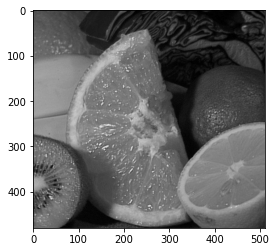

In [12]:
src = cv2.imread('fruits_div3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(src, cmap='gray')
plt.show()

256
output 16: 58
output 16: 254
output 16: 118


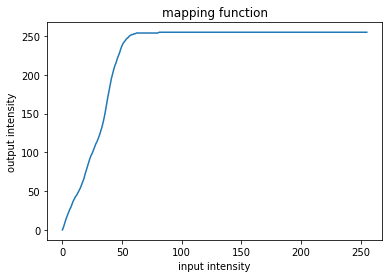

41 195 195


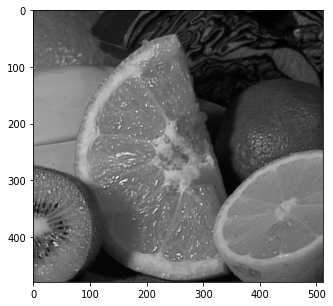

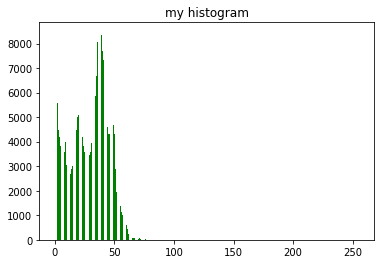

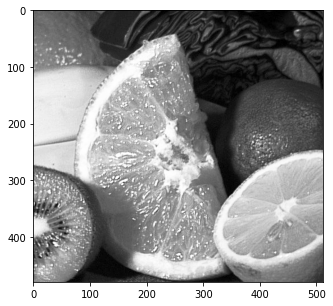

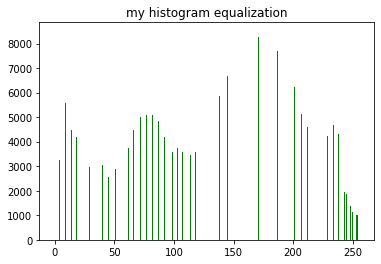

In [13]:
src = cv2.imread('fruits_div3.jpg', cv2.IMREAD_GRAYSCALE)
hist = my_calcHist(src)
dst, hist_equal = my_hist_equal(src)

plt.figure(figsize=(8, 5))
plt.imshow(src, cmap='gray')
plt.show()

binX = np.arange(len(hist))
plt.title('my histogram')
plt.bar(binX, hist, width=0.5, color='g')
plt.show()

plt.figure(figsize=(8, 5))
plt.imshow(dst, cmap='gray')
plt.show()

binX = np.arange(len(hist_equal))
plt.title('my histogram equalization')
plt.bar(binX, hist_equal, width=0.5, color='g')
plt.show()

# cv2.waitKey()
# cv2.destroyAllWindows()